# Investigating the impact of temporal multiplexing on neural population coding

Notebook contains code from CSHL Computational Neuroscience: Vision summer course project.

#### Written July 2022 by CMH

The goal of this project is to apply the findings of Caruso et al. (2018) and to explore the implications of this kind of temporal multiplexing to distributed population codes in visual cortex.  TODO: Add more explanation of the project.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis

## Step 1: Simulate a neural population

1. Generate a random ground truth population response vector for a single stimulus. These spike counts are randomly pulled from an exponential with parameters xyz. #TODO

2. Simulate the ground truth response to a second vector by defining a new vector a given number of degrees from the first vector. 

3. Simulate the response to either stimulus presented alone as random draws from the ground truth vectors. Simulate the response to both images simultaneously using the mixed poisson model tested in Caruso et al.. 

### Knobs that can be turned

* number of units in the population
* proportion of the population that is biased toward one ensemble at a time
* maximum firing rate of neurons
* number of presentations of the image

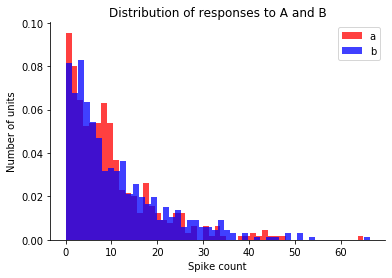

In [25]:
num_pres = 100 # number of presentations to simulate
num_units = 500 # number of units in the population
prop_maj = 0.8 # likelihood of representing stimulus a vs. stimulus b
exp_scale = 10 # scaling factor for random draws from exponential
angle_between = 60 # angle of rotation of vector b

a = np.random.exponential(exp_scale, (num_units,1)) # exponential distribution of spike counts
b = np.random.exponential(exp_scale, (num_units,1)) # TODO: Make an actual rotation

# Plot histogram of responses to A and B
fig, ax = plt.subplots()
ax.hist(a, 50, density=True, facecolor='r', alpha=0.75, label='a')
ax.hist(b, 50, density=True, facecolor='b', alpha=0.75, label='b')
ax.set_ylabel('Number of units')
ax.set_xlabel('Spike count')
ax.set_title('Distribution of responses to A and B')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

# Simulate response of 100 presentations of each image and images together
a_draws = np.random.poisson(lam=a, size=(num_units, num_pres)) # Random draws from poisson dist
b_draws = np.random.poisson(lam=b, size=(num_units, num_pres))
mix_draws = (prop_maj * np.random.poisson(lam=a, size=(num_units, num_pres))) + ((1-prop_maj) * np.random.poisson(lam=b, size=(num_units, num_pres))) # mixture model from Caruso et al.

Next, we train a cross-validated linear decoder to distinguish stimulus a from stimulus b. We start with an FLD classifier.

In [ ]:
# Implement cross-validation
# Training set uses subsample of all a presentations

# Implement classifier for each iteration (https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html?)
# Determine how close the multiplexed signal is to the decision boundary
